In [1]:
# importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# load the data
from google.colab import files
uploaded  = files.upload()

Saving Login.csv to Login.csv


In [3]:
log = pd.read_csv('Login.csv')

In [4]:
# Havinf Twitter Crenditials
costomersKey = log['Keys'][0]
costomersSecret = log['Keys'][1]
accessToken = log['Keys'][2]
accessTokenSecret = log['Keys'][3]


In [5]:
# creating authentication object
authenticate = tweepy.OAuthHandler(costomersKey,costomersSecret)
# Set access token and access token secret
authenticate.set_access_token(accessToken,accessTokenSecret)
# Create an APi object while passing in th eauth info
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
# Extrating 100 tweets form account
posts = api.user_timeline(screen_name = "BillGates", count = 100, land = 'en',tweet_mode = "extended")
# printing last 5 tweets from twitter accout
print("Show 5 recent tweets.")
i = 1
for tweet in posts[0:5]:
  print(str(i)+') '+ tweet.full_text + '\n')
  i=i+1

Show 5 recent tweets.
1) RT @IFPRI: 💡 From #climateadaptation to #genderequality, discover @CGIAR’s 50 years of innovations that changed the world 🌎 🎉: https://t.co…

2) The technological transformation we need to address climate change can create good, safe jobs and build a more equitable, prosperous economy. To make that happen, we need to think big: https://t.co/jFWTPyaOAq https://t.co/PR5sxI7aDt

3) I had a great time answering questions about my new book, climate change, and COVID-19 on @reddit last week. Here’s a recap of the conversation. https://t.co/Kvd2blqXkL

4) RT @WHO: It's #WorldTBDay

Even as we battle #COVID19, we must not ease up the fight against #Tuberculosis, which remains the 🌎🌍🌏’s deadlie…

5) I’m answering your questions now on @reddit: https://t.co/HXMsI0lSK1 https://t.co/XG7eAMNrGM



In [7]:
# create dataframe with column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

# show first 5 rows of data
df.head()

,Tweets
0,RT @IFPRI: 💡 From #climateadaptation to #gende...
1,The technological transformation we need to ad...
2,I had a great time answering questions about m...
3,RT @WHO: It's #WorldTBDay\n\nEven as we battle...
4,I’m answering your questions now on @reddit: h...


In [8]:
# Clean the text
# create a function to clean the text
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text) # Removed @mentioned
  text = re.sub(r'#', '',text) # Removed # mentioned
  text = re.sub(r'RT[\s]+', '',text) # Removes pics
  text = re.sub(r'https?:\/\/\S+', '',text)# Removed @websitesMentioned
  text = re.sub(r'_[A-Za-z0-9]+', '',text)
  text = re.sub(r':', '',text)
  return text
# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the Cleaned Text
df

,Tweets
0,"💡 From climateadaptation to genderequality, d..."
1,The technological transformation we need to ad...
2,I had a great time answering questions about m...
3,"It's WorldTBDay\n\nEven as we battle COVID19,..."
4,I’m answering your questions now on
...,...
95,I’m inspired by Quarraisha Abdool Karim and . ...
96,My parents taught me to leave the world bette...
97,I’m a big fan of author and was excited to ta...
98,“I will continue fighting. I will continue su...


In [9]:
# create function to get Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create function to get Subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create teo column
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# show the data frames
df

  

,Tweets,Subjectivity,Polarity
0,"💡 From climateadaptation to genderequality, d...",0.000000,0.000000
1,The technological transformation we need to ad...,0.425000,0.425000
2,I had a great time answering questions about m...,0.423737,0.312121
3,"It's WorldTBDay\n\nEven as we battle COVID19,...",0.000000,0.000000
4,I’m answering your questions now on,0.000000,0.000000
...,...,...,...
95,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000
96,My parents taught me to leave the world bette...,0.500000,0.500000
97,I’m a big fan of author and was excited to ta...,0.533333,0.208333
98,“I will continue fighting. I will continue su...,0.312500,0.062500


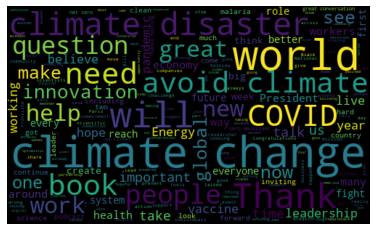

In [10]:
#Ploting WordCloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [11]:
# create a function to compute negative , nutral or positive sentiment
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"💡 From climateadaptation to genderequality, d...",0.000000,0.000000,Neutral
1,The technological transformation we need to ad...,0.425000,0.425000,Positive
2,I had a great time answering questions about m...,0.423737,0.312121,Positive
3,"It's WorldTBDay\n\nEven as we battle COVID19,...",0.000000,0.000000,Neutral
4,I’m answering your questions now on,0.000000,0.000000,Neutral
...,...,...,...,...
95,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000,Positive
96,My parents taught me to leave the world bette...,0.500000,0.500000,Positive
97,I’m a big fan of author and was excited to ta...,0.533333,0.208333,Positive
98,“I will continue fighting. I will continue su...,0.312500,0.062500,Positive


In [12]:
# print all positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+ ") "+sortedDF['Tweets'][i])
    print()
    j = j+1

1) The technological transformation we need to address climate change can create good, safe jobs and build a more equitable, prosperous economy. To make that happen, we need to think big  

2) I had a great time answering questions about my new book, climate change, and COVID-19 on  last week. Here’s a recap of the conversation. 

3) In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on  at 1115  

4) I named my book “How to Avoid a Climate Disaster,” not “How to Stop Climate Change,” because our climate is already changing—and no one will be hurt more by climate change than the world’s poorest people. Here's how we can help them adapt. 

5) Congratulations  on this important role. I’m excited to see what you and the Earth Fund will achieve. Avoiding a climate disaster is going to take all of us, and I’m grateful for ’s leadership and partnership. 

6) Thank you  for a great conversation about c

In [13]:
# print all negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+ ") "+sortedDF['Tweets'][i])
    print()
    j = j+1

1) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects  

2)  Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

3) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

4)  Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…

5) Recent extreme weather events are a stark reminder that we’re already seeing the effects of climate change here at home and around the world. This type of observation system will help scientists monitor and predict future weather events. 

6) There are several ways individuals can help move us closer to a zero-carbon future. Here are a few  



Text(0, 0.5, 'Subjectivity.')

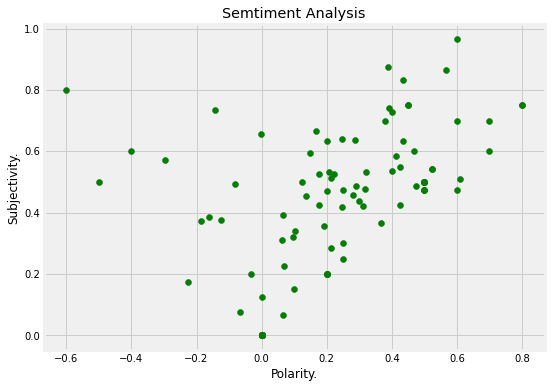

In [14]:
# ploting polarity ans subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color="Green")

plt.title("Semtiment Analysis")
plt.xlabel("Polarity.")
plt.ylabel("Subjectivity.")

In [15]:
# Get the percetage of positive and negative tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

print("Positive tweets percentge")
round((ptweets.shape[0] / df.shape[0]) * 100, 1)

Positive tweets percentge


72.0

In [16]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

print("Negative tweets percentge")
round((ntweets.shape[0] / df.shape[0]) * 100, 1)


Negative tweets percentge


13.0

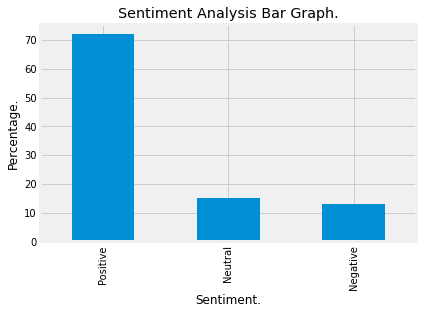

In [17]:
# showing bar graph
df['Analysis'].value_counts()

# Plot and visualize the graph
plt.title("Sentiment Analysis Bar Graph.")
plt.xlabel("Sentiment.")
plt.ylabel("Percentage.")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()